In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [144]:
weather=pd.read_csv(r'C:\Users\Vinh Hoa Tu\Downloads/london_weather123.csv')
print(weather.head())
print(weather.info())
sunshine=weather[['date', 'sunshine']]
print(sunshine)

       date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7              27.0       1.6       -2.6   
2  19790103          5.0       0.0              13.0       1.3       -2.8   
3  19790104          8.0       0.0              13.0      -0.3       -2.6   
4  19790105          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  
0      -7.5            0.4  101900.0         9.0  
1      -7.5            0.0  102530.0         8.0  
2      -7.2            0.0  102050.0         4.0  
3      -6.5            0.0  100840.0         2.0  
4      -1.4            0.0  102250.0         1.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341

In [145]:
sunshine['date']=sunshine['date'].astype(str)
sd = sunshine[sunshine['date'].str.endswith(('01','15'))] # only keep date 01 and 15
sd= sd.reset_index() #reset the indice of dataframe
sd=sd.drop('index',axis=1)

C:\Users\Vinh Hoa Tu\AppData\Local\Temp\ipykernel_17224\461779359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sunshine['date']=sunshine['date'].astype(str)


In [146]:
sd

,date,sunshine
0,19790101,7.0
1,19790115,0.0
2,19790201,0.0
3,19790215,0.0
4,19790301,6.4
...,...,...
1003,20201015,2.7
1004,20201101,0.7
1005,20201115,0.7
1006,20201201,1.0


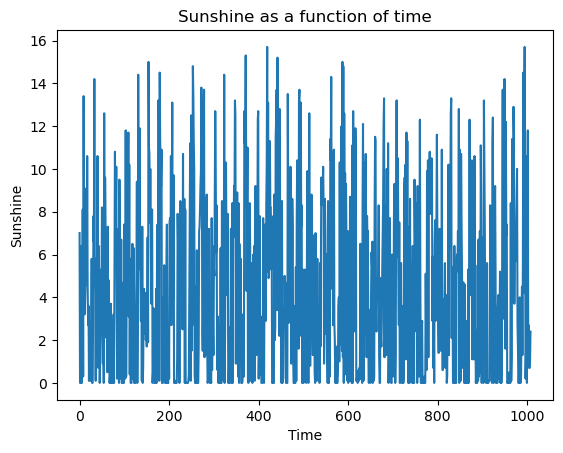

In [147]:
#show sd
plt.plot(sd['sunshine'])
plt.title('Sunshine as a function of time')
plt.xlabel('Time')
plt.ylabel('Sunshine')
plt.show()

In [148]:
mean=sd['sunshine'].mean()
variance=sd['sunshine'].var()
print(f'Moyenne : {mean}, Variance :{variance}')

Moyenne : 4.454265873015872, Variance :16.95326877531872


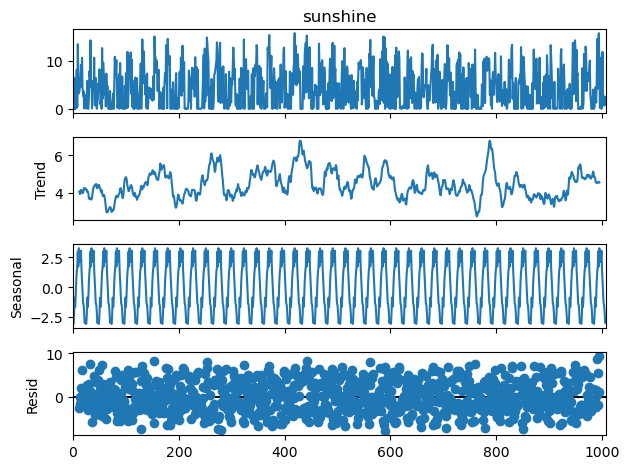

In [149]:
#decompose the serie into trend, seasonal, residual and stationary serie
from statsmodels.tsa.seasonal import seasonal_decompose
result= seasonal_decompose(sd['sunshine'], model='additive',period=24)
result.plot()
plt.show()

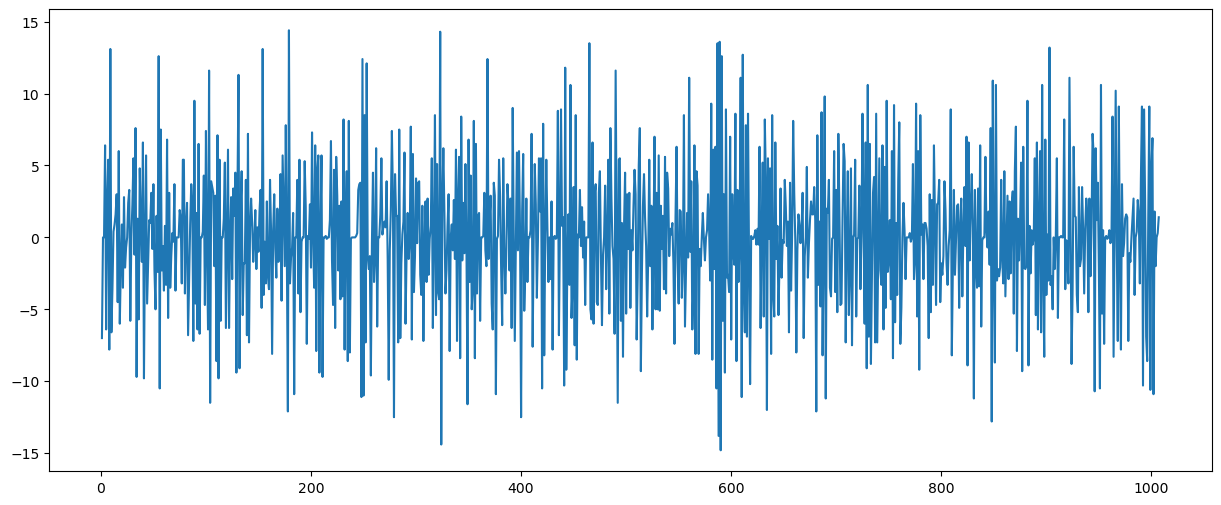

In [150]:
plt.figure(figsize=(15,6))
plt.plot(sd['sunshine'].diff()) # remove trend and season of sunshine by differencing 
stationnarized=sd['sunshine'].diff()

In [151]:
#Augmented Dickey-Fuller Test to test the stationarity of (Xt)
from statsmodels.tsa.stattools import adfuller
adfuller(sd['sunshine'])[1]
# <= 0.05 so X(t) is stationary

3.019711565769702e-10

In [152]:
stationnarized=stationnarized.dropna()

In [153]:
stationnarized

1      -7.0
2       0.0
3       0.0
4       6.4
5      -6.4
       ... 
1003    1.8
1004   -2.0
1005    0.0
1006    0.3
1007    1.4
Name: sunshine, Length: 1007, dtype: float64

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

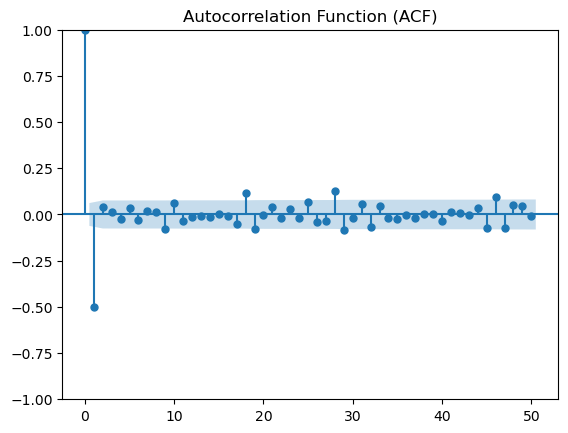

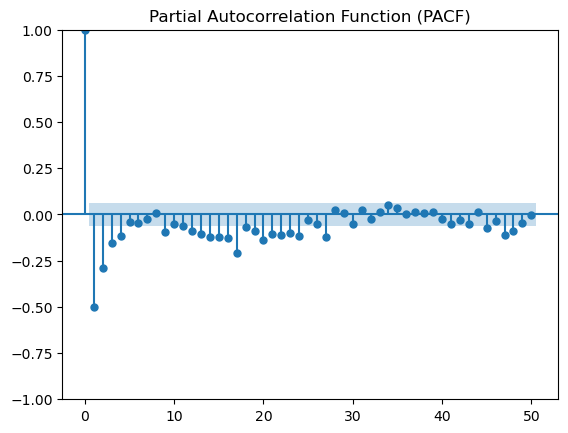

In [207]:
#ACF and PACF

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# PLot ACF
plot_acf(stationnarized, lags=50)
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
plot_pacf(stationnarized, lags=(50))
plt.title('Partial Autocorrelation Function (PACF)')



In [208]:
len(train_data)
len(test_data)
len(stationnarized)
len(predict)

100

In [217]:
# train AR(4) model, lag=4 in summary AutoReg(4)

from statsmodels.tsa.ar_model import AutoReg
train_data = stationnarized[:len(stationnarized)-100]
test_data = stationnarized[len(stationnarized)-100:]
ar_model = AutoReg(train_data, lags=27).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:               sunshine   No. Observations:                  907
Model:                    AutoReg(27)   Log Likelihood               -2398.388
Method:               Conditional MLE   S.D. of innovations              3.693
Date:                Tue, 12 Dec 2023   AIC                           4854.775
Time:                        21:40:54   BIC                           4993.393
Sample:                            27   HQIC                          4907.785
                                  907                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0041      0.125     -0.033      0.974      -0.248       0.240
sunshine.L1     -0.9154      0.033    -27.382      0.000      -0.981      -0.850
sunshine.L2     -0.7717      0.045    -17.10

C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [210]:
# prediction
predict= ar_model.predict(start= len(train_data)+1, end=len(stationnarized),dynamic=False)

C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Text(0.5, 1.0, 'Serie with the last 10% of value highlighted in red')

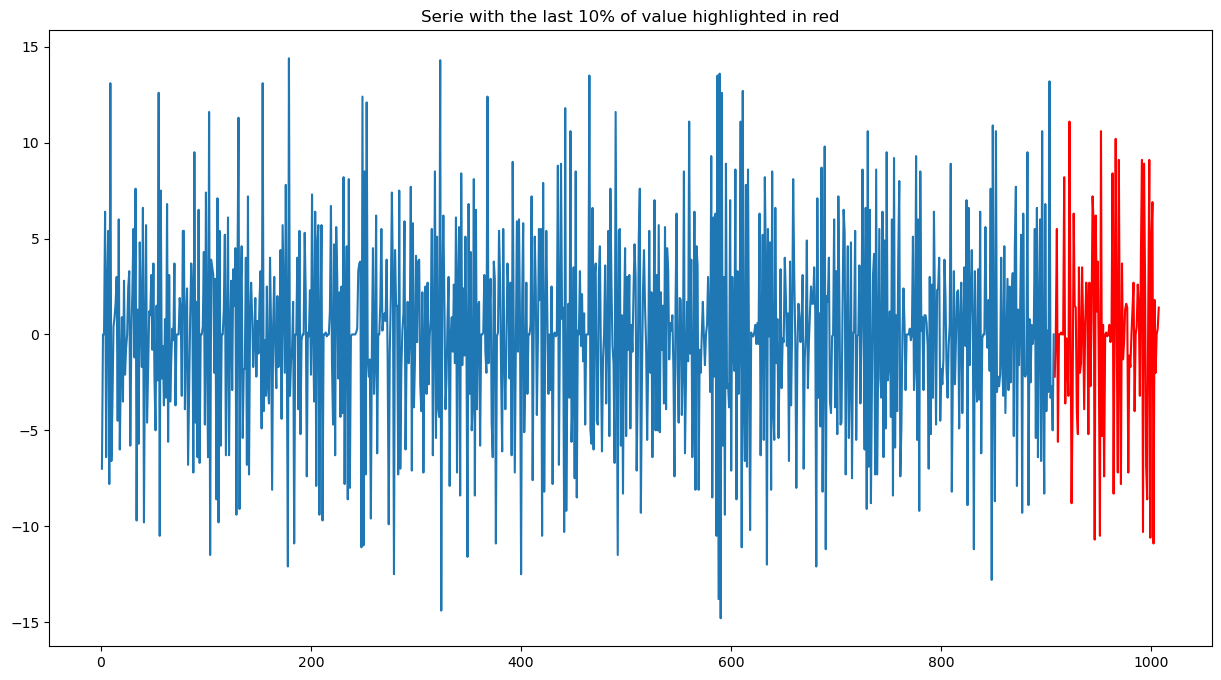

In [211]:
# ploting the serie with the last 10% of value highlighted in red
plt.figure(figsize=(15,8))
plt.plot(test_data, color='red')
plt.plot(stationnarized[:len(stationnarized)-100])
plt.title('Serie with the last 10% of value highlighted in red')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


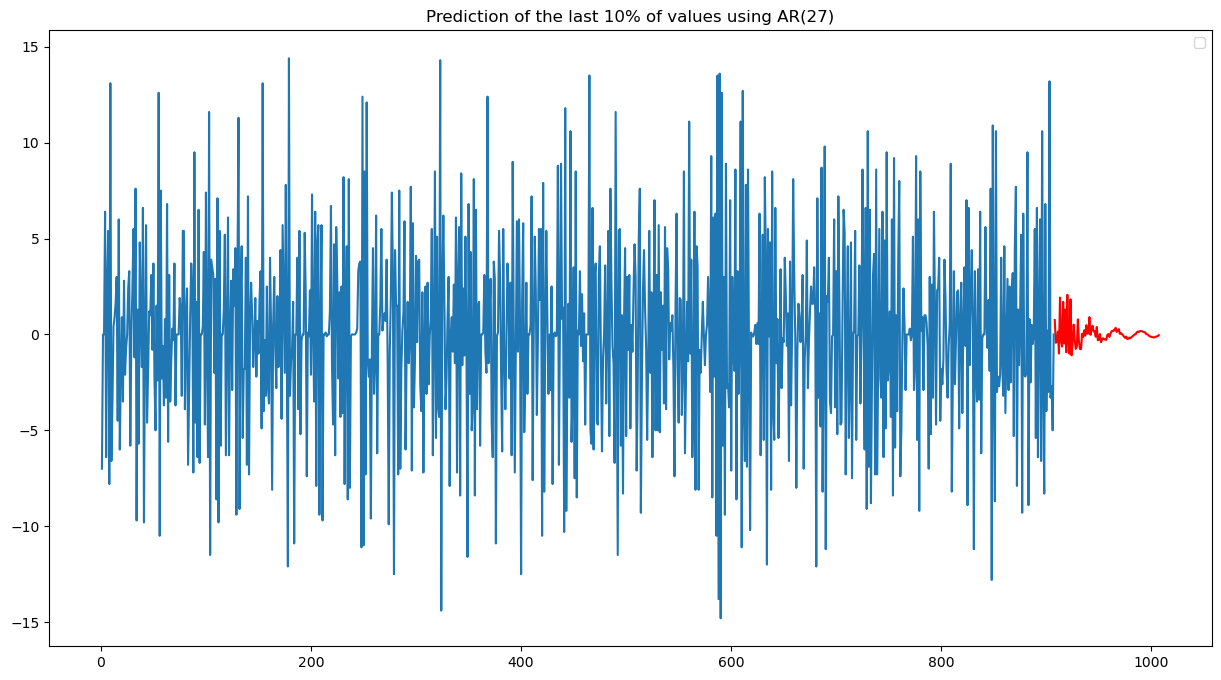

In [212]:
#prediction with AR model
plt.figure(figsize=(15,8))
plt.plot(predict, color='red')
plt.plot(stationnarized[:len(stationnarized)-100])
plt.title('Prediction of the last 10% of values using AR(27)')
plt.legend()

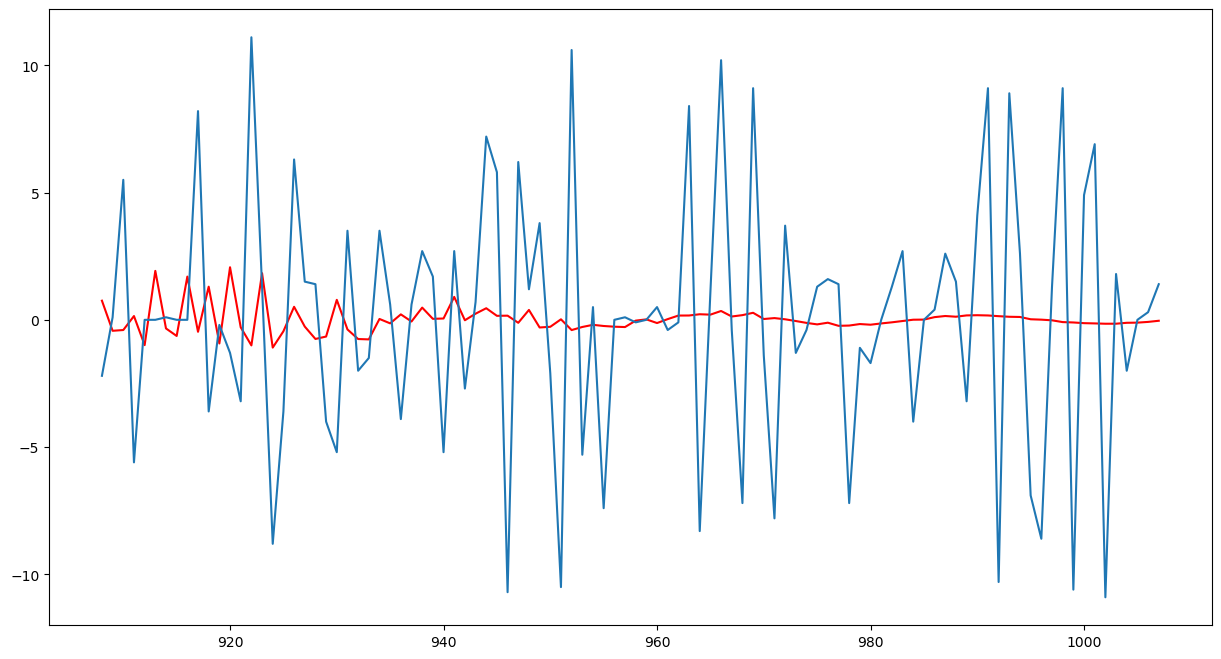

In [213]:
# ploting test_data and prediction using AR(27) modele
plt.figure(figsize=(15,8))
plt.plot(predict, color='red')
plt.plot(test_data)

Text(0.5, 1.0, 'ACF of standardized residuals')

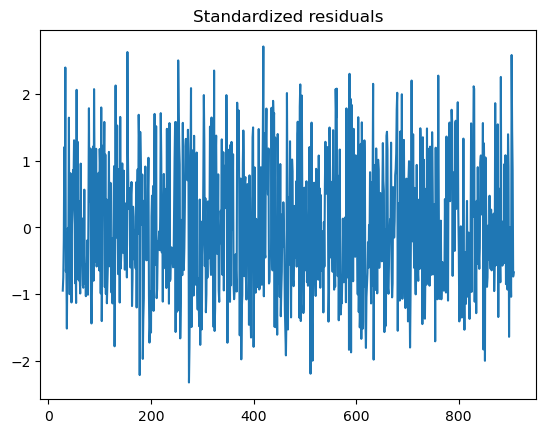

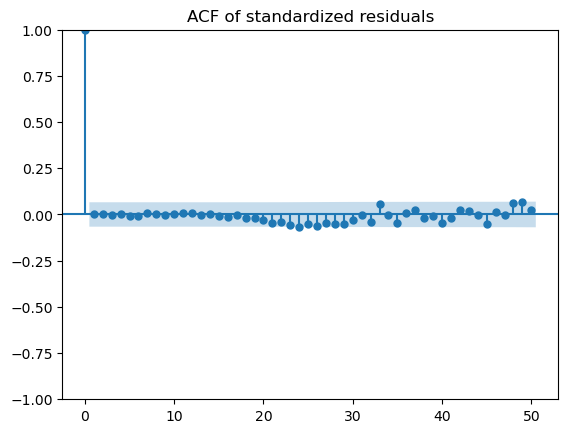

In [214]:
# residuals of model AR after training
residuals = ar_model.resid

# standadized residuals
std_residuals = residuals / np.std(residuals)

#plot
plt.plot(std_residuals)
plt.title('Standardized residuals')

plot_acf(std_residuals, lags=50)
plt.title('ACF of standardized residuals')

In [215]:
#Using Ljung-box to determine the confidence of the non-hypothesis
import statsmodels.api as sm

df= sm.stats.acorr_ljungbox(residuals, lags=20)
df1=pd.DataFrame(df,columns=['lb_pvalue'])

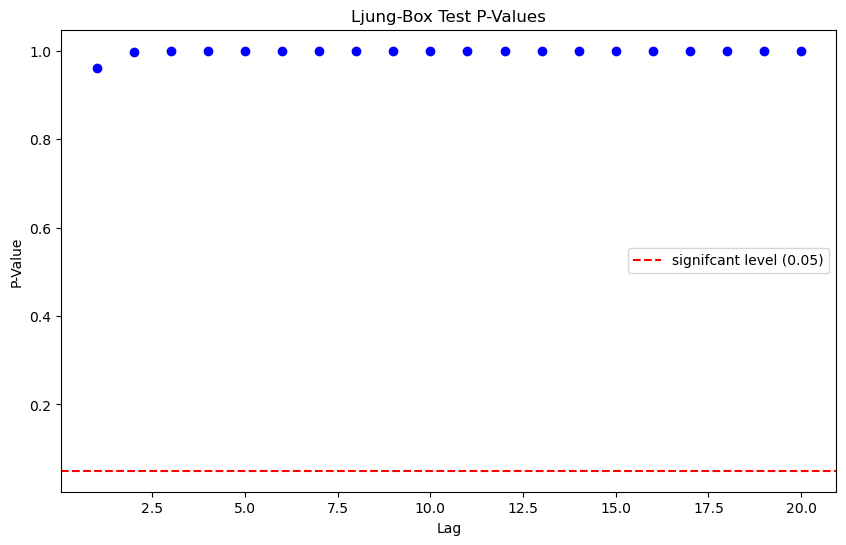

In [196]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,21), df1, marker='o', linestyle='', color='b')
plt.axhline(y=0.05, color='r', linestyle='--', label='signifcant level (0.05)')
plt.title('Ljung-Box Test P-Values')
plt.xlabel('Lag')
plt.ylabel('P-Value')
plt.legend()
plt.show()